In [1]:
### harmonic_analysis_nyquist - ATOC7500 Lecture #9
### coded by Libby Barnes (CSU), additional commenting/conversion to ipynb3 by Jennifer Kay (CU)
### Last updated October 12, 2020
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
## needed in ipython notebooks to make plots appear in-line

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.  ]
4.0
80


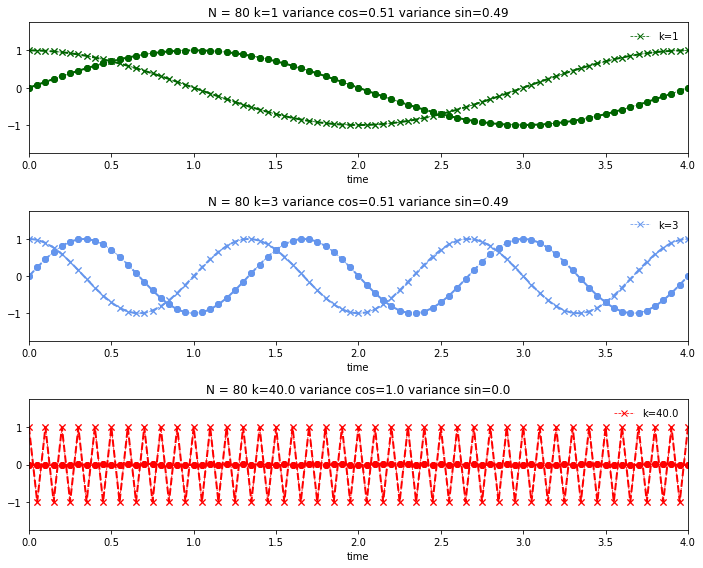

In [2]:
### Example showing waves of different wave-lengths, and why k=N/2 (Nyquist Frequency) is "special"
## Nyquist is special because all variance is explained by cosine, none by sine

T = 4.0                        ## record length
dt = 0.05                      ## timestep
t = np.arange(0.,T+dt,dt)      ## all times
N = np.size(t)-1               ## number of samples 
print(t)
print(T)
print(N)

nplots=3
gs=GridSpec(nplots,1)
fig=plt.figure(figsize=(10,8));
COLOR_MAT = ['darkgreen','cornflowerblue','red','orange','navy','hotpink','grey']

count = -1
for k in (1,3,N/2):
    count = count + 1
    y1 = np.cos(2.*np.pi*k*t/T);
    y2 = np.sin(2.*np.pi*k*t/T);
    plt.subplot(gs[count,0]);
    plt.plot(t,y1,'x--',color = COLOR_MAT[count], linewidth = 2.);
    plt.plot(t,y2,'o--',color = COLOR_MAT[count], linewidth = 2.); 
    plt.xlim(np.min(t),np.max(t));
    plt.ylim(-1.75,1.75);
    plt.xlabel('time');
    plt.title('N = ' + str(N) + ' k='+str(k)+ ' variance cos='+ str(round(np.var(y1),2))+ ' variance sin='+ str(round(np.var(y2),2)));
    plt.plot(t,y1,'x--',color = COLOR_MAT[count],linewidth = 0.75, label = 'k='+str(k));
    plt.plot(t,y2,'o--',color = COLOR_MAT[count],linewidth = 0.75);
    plt.legend(frameon = False);
    fig.tight_layout();

Lowest Frequency: 1 time step?
Nyquist Frequency:  25.0 time steps


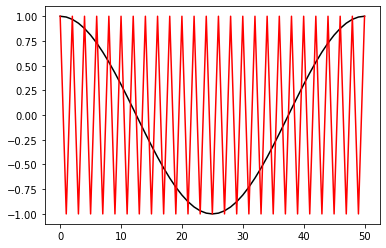

In [4]:
### Example showing the highest and lowest resolved frequencies for 100 years of yearly data
T = 50                        ## record length (years)
dt = 1                         ## timestep (year)
t = np.arange(0.,T+dt,dt)      ## all times
N = np.size(t)-1               ## number of samples 

## lowest frequency resolved
k=1
lowfreq=np.cos(2*np.pi*k*(t/N))
plt.plot(lowfreq,label='lowest resolved frequency',color='k')
print('Lowest Frequency:', '1 time step?')
## highest frequency resolved - the Nyquist Frequency
k=N/2
print('Nyquist Frequency: ',k, 'time steps')
highfreq=np.cos(2*np.pi*k*(t/N));
plt.plot(highfreq,label='highest resolved frequency (Nyquist)',color='r');
plt.legend();

[ 0.    0.01  0.02 ...  9.98  9.99 10.  ]
10
1000


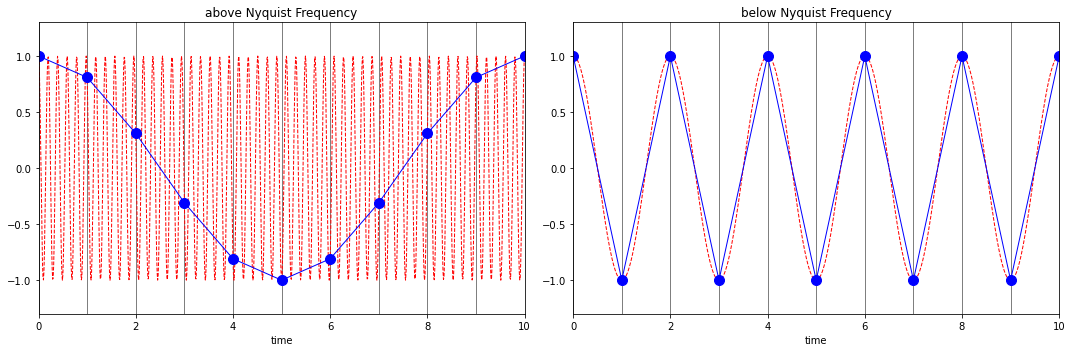

In [5]:
## Aliasing example
T = 10                        ## total time
dt = 0.01                      ## timestep
t = np.arange(0.,T+dt,dt)      ## all times
N = np.size(t)-1               ## number of samples 
print(t)
print(T)
print(N)

gs=GridSpec(1,2)
fig=plt.figure(figsize=(15,5))

### Recall that the wave number of the Nyquist frequency is k=N/2

##### Pick a wave number k (# oscillations that occur in each time step) that exceeds the Nyquist frequency
k = 51 #  
plt.subplot(gs[0,0])
plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.3,1.3)
plt.xlabel('time')
plt.title('')
for i in np.arange(0,11,1):
    plt.plot((i*1.,i*1.),(-2.,2.),'-',color = 'black',linewidth = .5);
y1 = np.cos(2.*np.pi*k*t/T)
y2 = np.sin(2.*np.pi*k*t/T)
plt.plot(t,y1,'--',color = 'red', linewidth = 1.);
t1 = np.arange(np.min(t),np.max(t)+1,1)
y11 = np.cos(2.*np.pi*k*t1/T)
y22 = np.sin(2.*np.pi*k*t1/T)
plt.plot(t1,y11,'.',color = 'blue',markersize = 20);
plt.plot(t1,y11,'-',color = 'blue',markersize = 20, linewidth = 1.);
plt.title('above Nyquist Frequency')

##### Pick a wave number k (# oscillations that occur in each time step) below the Nyquist frequency
k = 5
plt.subplot(gs[0,1])
plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.3,1.3)
plt.xlabel('time')
plt.title('')
for i in np.arange(0,11,1):
    plt.plot((i*1.,i*1.),(-2.,2.),'-',color = 'black',linewidth = .5);
#t = np.arange(0.,T+.01,.01)
y1 = np.cos(2.*np.pi*k*t/T)
y2 = np.sin(2.*np.pi*k*t/T)
plt.plot(t,y1,'--',color = 'red', linewidth = 1.);
t1 = np.arange(np.min(t),np.max(t)+1,1)
y11 = np.cos(2.*np.pi*k*t1/T)
y22 = np.sin(2.*np.pi*k*t1/T)
plt.plot(t1,y11,'.',color = 'blue',markersize = 20);
plt.plot(t1,y11,'-',color = 'blue',markersize = 20, linewidth = 1.);
plt.title('below Nyquist Frequency')
fig.tight_layout()

In [19]:
### Example demonstrating that sines and cosines are uncorrelated (not using in class)
T = 100.
t = np.arange(0.,T,.1)
for k in np.arange(1,11,1):
    y0 = np.cos(2*np.pi*(k+1)*t/T)
    y1 = np.cos(2*np.pi*(k)*t/T)    
    y2 = np.sin(2*np.pi*(k)*t/T)
    c01 = np.corrcoef(y0,y1)[1][0]
    c12 = np.corrcoef(y1,y2)[1][0]
    print('correlation of cos(' + str(k) + ') and cos(' + str(k+1) + ') = ' + str(round(c01,2)))
    print('correlation of cos(' + str(k) + ') and sin(' + str(k) + ') = ' + str(round(c12,2)))

correlation of cos(1) and cos(2) = -0.0
correlation of cos(1) and sin(1) = -0.0
correlation of cos(2) and cos(3) = -0.0
correlation of cos(2) and sin(2) = -0.0
correlation of cos(3) and cos(4) = 0.0
correlation of cos(3) and sin(3) = -0.0
correlation of cos(4) and cos(5) = 0.0
correlation of cos(4) and sin(4) = 0.0
correlation of cos(5) and cos(6) = 0.0
correlation of cos(5) and sin(5) = 0.0
correlation of cos(6) and cos(7) = -0.0
correlation of cos(6) and sin(6) = -0.0
correlation of cos(7) and cos(8) = 0.0
correlation of cos(7) and sin(7) = 0.0
correlation of cos(8) and cos(9) = -0.0
correlation of cos(8) and sin(8) = 0.0
correlation of cos(9) and cos(10) = 0.0
correlation of cos(9) and sin(9) = 0.0
correlation of cos(10) and cos(11) = -0.0
correlation of cos(10) and sin(10) = 0.0
